In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/mldata.csv")

In [3]:
data

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Interested Type of Books,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Series,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Autobiographies,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Travel,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Guide,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Health,Technical,hard worker,yes,no,Applications Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,yes,no,shell programming,hacking,poor,poor,Software Engineering,testing,Testing and Maintainance Services,yes,Trilogy,Management,smart worker,no,yes,Web Developer
6897,6,5,1,8,no,no,machine learning,hacking,excellent,excellent,programming,testing,Testing and Maintainance Services,no,Science,Management,hard worker,no,no,Web Developer
6898,5,1,6,7,yes,no,distro making,data science,poor,poor,IOT,system developer,Cloud Services,yes,Self help,Technical,hard worker,yes,no,Web Developer
6899,1,6,4,6,no,no,app development,game development,poor,excellent,data engineering,developer,SAaS services,no,Drama,Technical,smart worker,no,yes,Web Developer


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [5]:
data.dropna(inplace=True)

In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\n\nList of Categorical features: \n" , categorical_cols )



List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [7]:
cols = data[["self-learning capability?", "Extra-courses did","Taken inputs from seniors or elders", "worked in teams ever?", "Introvert"]]

for i in cols:
    cleanup_nums = {i: {"yes": 1, "no": 0}}
    data = data.replace(cleanup_nums)

print("\n\nList of Categorical features: \n" ,  data.select_dtypes(include=['object']).columns.tolist())



List of Categorical features: 
 ['certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical', 'hard/smart worker', 'Suggested Job Role']


In [8]:
mycol = data[["reading and writing skills", "memory capability score"]]
for i in mycol:
    cleanup_nums = {i: {"poor": 0, "medium": 1, "excellent": 2}}
    data = data.replace(cleanup_nums)

category_cols = data[['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books','Suggested Job Role']]

Dict={}
for i in category_cols:
    data[i] = data[i].astype('category')
    data[i + "_code"] = data[i].cat.codes
    
    if i=="Suggested Job Role":
        for j in range(0,len(data.axes[0])):
            Dict[data[i+"_code"].iloc[j]] = data[i].iloc[j]

print("\n\nList of Categorical features: \n" , data.select_dtypes(include=['object']).columns.tolist())
print("\n\n",Dict)



List of Categorical features: 
 ['Management or Technical', 'hard/smart worker']


 {0: 'Applications Developer', 1: 'CRM Technical Developer', 2: 'Database Developer', 3: 'Mobile Applications Developer', 4: 'Network Security Engineer', 5: 'Software Developer', 6: 'Software Engineer', 7: 'Software Quality Assurance (QA) / Testing', 8: 'Systems Security Administrator', 9: 'Technical Support', 10: 'UX Designer', 11: 'Web Developer'}


In [9]:
print(data['Management or Technical'].unique())
print(data['hard/smart worker'].unique())

['Management' 'Technical']
['smart worker' 'hard worker']


In [10]:
data = pd.get_dummies(data, columns=["Management or Technical", "hard/smart worker"], prefix=["A", "B"])

In [26]:
newData = data.drop(['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 
                    'Interested Type of Books',"Suggested Job Role"], axis=1 )

KeyError: "['certifications', 'workshops', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Suggested Job Role'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split

X=newData.drop(["Suggested Job Role_code"], axis=1)
y=newData["Suggested Job Role_code"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
train_data = X_train.join(y_train)

In [24]:
train_data

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,reading and writing skills,memory capability score,Taken inputs from seniors or elders,worked in teams ever?,...,workshops_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Interested Type of Books_code,A_Management,A_Technical,B_hard worker,B_smart worker,Suggested Job Role_code
4787,8,6,1,4,0,1,0,1,1,1,...,7,1,0,1,30,0,1,1,0,8
4616,7,4,7,5,1,0,2,2,1,0,...,6,5,5,2,16,0,1,1,0,8
6370,3,2,7,4,0,0,1,1,1,0,...,4,4,4,7,1,1,0,1,0,11
2777,1,0,2,3,1,0,2,2,1,1,...,0,1,4,7,4,1,0,0,1,4
2218,2,0,6,1,1,1,1,0,0,0,...,6,3,3,6,16,0,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6776,3,2,5,2,0,1,0,0,1,1,...,0,8,5,1,27,0,1,0,1,11
4044,3,4,1,3,0,1,2,2,1,0,...,4,8,2,7,13,1,0,0,1,7
6847,8,2,5,8,1,1,0,1,1,0,...,4,0,2,5,22,1,0,0,1,11
2979,2,3,9,7,1,0,0,1,0,1,...,1,4,1,4,9,1,0,1,0,5


<AxesSubplot: >

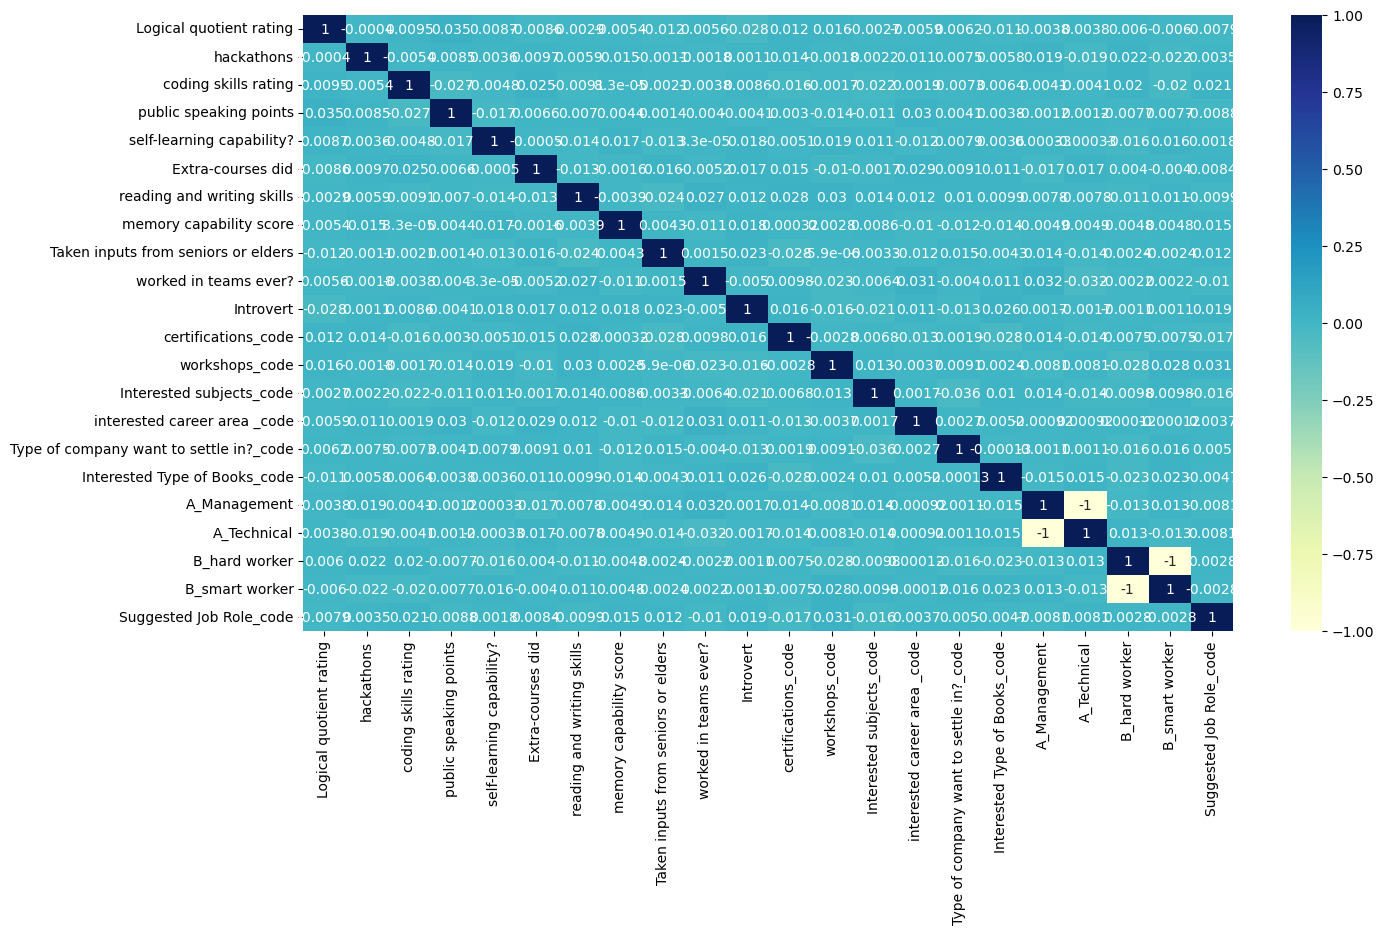

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")